In [3]:
import pandas as pd
import numpy as np

In [40]:
moca_df = pd.read_csv("data/df_unnormalized.csv")
moca_df.describe()



,Unnamed: 0,X,Identifier,oppart,oper_side_oxig,other_side_oxig,HR,HR_change,systoles,diastoles,...,Tünetes,Tömeg,Testmagasság,BMI,végzettség,RE_SE_DIFF,RE_SE_DIFF_ABS,etco2,MAP,oldal
count,40977.000000,40977.000000,40977.000000,40977.000000,40977.000000,40898.000000,40856.000000,40856.000000,40639.000000,40618.000000,...,40977.000000,40977.000000,40977.000000,40977.000000,40977.000000,35080.000000,35080.000000,34482.000000,40629.000000,40977.000000
mean,20489.000000,20489.000000,150.679796,3.471972,68.618320,73.043113,68.390322,1.885944,132.854415,62.806777,...,0.028650,81.592991,168.866340,28.659208,12.359153,3.831072,3.831072,32.766301,87.988276,1.498231
std,11829.185327,11829.185327,85.524047,0.706521,11.071667,9.089092,16.957680,24.984169,28.247796,13.417034,...,0.166823,12.624860,7.930814,4.470611,2.380886,4.742056,4.742056,5.092390,18.227118,0.500003
min,1.000000,1.000000,52.000000,3.000000,35.000000,41.400000,0.000000,-100.000000,28.860000,21.830000,...,0.000000,48.000000,150.000000,19.705532,8.000000,0.000000,0.000000,8.850000,25.990000,1.000000
25%,10245.000000,10245.000000,93.000000,3.000000,60.600000,67.000000,57.000000,-9.497207,112.960000,53.340000,...,0.000000,72.000000,165.000000,26.175195,11.000000,1.000000,1.000000,29.625000,75.250000,1.000000
50%,20489.000000,20489.000000,123.000000,3.000000,68.833333,72.600000,66.000000,-1.939334,131.040000,61.900000,...,0.000000,82.000000,170.000000,28.763971,11.000000,2.000000,2.000000,32.550000,86.830000,1.000000
75%,30733.000000,30733.000000,147.000000,4.000000,76.400000,79.800000,76.000000,6.567534,150.260000,70.637500,...,0.000000,90.000000,175.000000,30.668905,15.000000,5.000000,5.000000,35.550000,99.020000,2.000000
max,40977.000000,40977.000000,336.000000,5.000000,95.000000,95.000000,267.000000,400.672948,269.150000,170.480000,...,1.000000,107.000000,184.000000,41.333333,18.000000,49.000000,49.000000,69.075000,210.450000,2.000000


In [5]:
patients_moca_low = moca_df[moca_df['DeltaMOCA1'] <= 0]
patients_moca_high = moca_df[moca_df['DeltaMOCA1'] > 0]
id_moca_low = np.unique(patients_moca_low['Identifier'].values)
id_moca_high = np.unique(patients_moca_high['Identifier'].values)
print(id_moca_high.shape)
print(id_moca_low.shape)
id_moca_high


(26,)
(50,)


array([ 59,  66,  68,  72,  80,  81,  82,  85,  95,  99, 110, 113, 114,
       121, 122, 124, 125, 126, 128, 142, 145, 163, 164, 309, 333, 334],
      dtype=int64)

In [6]:
metric_df = pd.read_csv("data/metric_to_moca_analysis.csv")
metric_df.head()

,Metric,Analysis,Test_Type,p_value,Effect_Size,Significance,Good_Metric_N,Good_Metric_MOCA_Mean,Good_Metric_MOCA_Std,Bad_Metric_N,Bad_Metric_MOCA_Mean,Bad_Metric_MOCA_Std,Good_Normal,Bad_Normal
0,CardiacCouplingStrength_Cardiac,Metric_to_MOCA,Mann-Whitney,0.159002,0.186552,ns,4,-1.750000,0.957427,53,-0.471698,1.877025,True,False
1,PulseAmplitudeSE_Cardiac,Metric_to_MOCA,Mann-Whitney,0.518648,0.085489,ns,51,-0.607843,1.800871,6,-0.166667,2.401388,False,True
2,CardiacPhaseLag_Cardiac,Metric_to_MOCA,Mann-Whitney,0.592345,0.070921,ns,12,-0.833333,1.800673,45,-0.488889,1.878372,True,False
3,PulseWaveVelocity_Cardiac,Metric_to_MOCA,Mann-Whitney,0.143300,0.215798,ns,32,-0.250000,2.000000,14,-1.071429,1.384768,False,True
4,AutoregulationEffectiveness_Endothelial,Metric_to_MOCA,t-test,0.295235,0.354686,ns,46,-0.434783,1.796938,11,-1.090909,2.071451,True,True


In [8]:
ranges_df = pd.read_csv('data/ranges.csv', header=None, names=['Metric', 'OptimalMin', 'OptimalMax', 'ValidMin', 'ValidMax'])

significant_wavelet_metrics = metric_df[metric_df['Significance'].isin(["*","**", "***"])]
significant_wavelet_metrics.shape
significant_wavelet_metrics



,Metric,Analysis,Test_Type,p_value,Effect_Size,Significance,Good_Metric_N,Good_Metric_MOCA_Mean,Good_Metric_MOCA_Std,Bad_Metric_N,Bad_Metric_MOCA_Mean,Bad_Metric_MOCA_Std,Good_Normal,Bad_Normal
8,COx_SingleHemisphere_Endothelial,Metric_to_MOCA,t-test,0.045033,0.647480,*,13,-1.461538,1.808101,44,-0.295455,1.798960,True,True
16,VasomotionStrength_SE,Metric_to_MOCA,Mann-Whitney,0.032151,0.283784,*,25,-1.120000,1.641138,32,-0.125000,1.913450,True,False
24,rSO2_Power_Endothelial,Metric_to_MOCA,Mann-Whitney,0.003822,0.383116,**,43,-0.139535,1.740025,14,-1.857143,1.610406,False,True
25,PowerRatio_Endothelial,Metric_to_MOCA,Mann-Whitney,0.002958,0.393660,**,33,-1.181818,1.810638,24,0.291667,1.573674,True,False
31,Lx_Endothelial,Metric_to_MOCA,Mann-Whitney,0.029473,0.288364,*,16,0.312500,1.493039,41,-0.902439,1.881554,True,False
60,TransferGainVariability_LF,Metric_to_MOCA,Mann-Whitney,0.029826,0.287741,*,54,-0.685185,1.820471,3,1.666667,0.577350,False,False
89,TransferPhaseVariability_Myogenic,Metric_to_MOCA,Mann-Whitney,0.023076,0.300958,*,28,0.035714,1.855565,29,-1.137931,1.684470,False,True
93,AutonomicModulation_Neurogenic,Metric_to_MOCA,Mann-Whitney,0.013732,0.355675,*,22,-1.181818,1.789822,26,0.076923,1.718676,True,False
105,PowerRatio_Neurogenic,Metric_to_MOCA,Mann-Whitney,0.016912,0.316381,*,20,-1.350000,1.725200,37,-0.135135,1.797563,True,False
109,Lx_Neurogenic,Metric_to_MOCA,Mann-Whitney,0.043887,0.266915,*,16,0.250000,1.483240,41,-0.878049,1.899936,True,False


In [10]:
wavelet_metric_patients_df = pd.read_csv("data/selected_metrics_export.csv")
wavelet_metric_patients_df

,Metric,Patient_52,Patient_54,Patient_58,Patient_59,Patient_60,Patient_63,Patient_64,Patient_65,Patient_66,...,Patient_311,Patient_312,Patient_314,Patient_322,Patient_327,Patient_329,Patient_333,Patient_334,Patient_335,Patient_336
0,COx_SingleHemisphere_Endothelial,0.138924,0.242893,0.178444,0.064573,-0.039334,0.318814,0.280852,0.086133,0.162194,...,0.186168,-0.258035,NaN,0.034164,NaN,NaN,NaN,NaN,NaN,NaN
1,VasomotionStrength_SE,1.999996,1.856727,2.323487,2.771456,1.641324,2.451361,2.149000,3.877866,3.557458,...,1.954335,1.325436,NaN,2.692129,NaN,NaN,NaN,NaN,NaN,NaN
2,rSO2_Power_Endothelial,0.127887,0.416517,0.706370,0.076352,0.393655,0.206073,0.320824,0.051991,0.311255,...,0.731091,1.027169,NaN,0.202371,NaN,NaN,NaN,NaN,NaN,NaN
3,PowerRatio_Endothelial,25.334401,4.651901,7.174435,78.469590,9.449363,28.661513,13.865917,233.396463,37.476471,...,5.478523,0.992615,NaN,36.838285,NaN,NaN,NaN,NaN,NaN,NaN
4,Lx_Endothelial,-0.111970,0.872836,0.345576,0.305775,0.761291,0.220625,0.685810,0.375628,-0.534580,...,0.035335,0.960441,NaN,0.601880,NaN,NaN,NaN,NaN,NaN,NaN
5,TransferGainVariability_LF,0.181353,0.123370,0.264958,0.539371,0.252988,0.292882,0.155838,0.231532,0.281712,...,0.199679,0.282039,NaN,0.324643,NaN,NaN,NaN,NaN,NaN,NaN
6,TransferPhaseVariability_Myogenic,87.277812,112.797145,111.303987,49.553742,146.097525,82.647682,111.489305,106.075500,84.905501,...,103.506654,65.589922,NaN,118.082572,NaN,NaN,NaN,NaN,NaN,NaN
7,AutonomicModulation_Neurogenic,0.033098,0.242634,-0.065148,0.242445,-0.071806,0.346732,0.003471,0.071887,-0.060575,...,0.142448,0.500809,NaN,0.129568,NaN,NaN,NaN,NaN,NaN,NaN
8,PowerRatio_Neurogenic,32.630060,28.106183,12.706299,91.320544,12.076423,29.807023,23.540333,367.430004,50.328705,...,9.450921,1.784776,NaN,53.215203,NaN,NaN,NaN,NaN,NaN,NaN
9,Lx_Neurogenic,-0.042524,0.910172,0.056127,0.219450,0.613292,0.105952,0.485593,0.307671,-0.577873,...,0.081511,0.961543,NaN,0.675953,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np

# Adatok betöltése
ranges_df = pd.read_csv('data/ranges.csv', header=None, 
                        names=['Metric', 'OptimalMin', 'OptimalMax', 'ValidMin', 'ValidMax'])

wavelet_metric_patients_df = pd.read_csv("data/selected_metrics_export.csv")

# Beteg oszlopok azonosítása
patient_columns = [col for col in wavelet_metric_patients_df.columns if col.startswith('Patient_')]

# Eredmények gyűjtése
results = []

# Minden metrikán végigmegyünk
for idx, row in wavelet_metric_patients_df.iterrows():
    metric_name = row['Metric']
    
    # Range keresése
    range_match = ranges_df[ranges_df['Metric'] == metric_name]
    if range_match.empty:
        continue
    
    opt_min = range_match.iloc[0]['OptimalMin']
    opt_max = range_match.iloc[0]['OptimalMax']
    
    # Betegek csoportosítása
    good_patients = []
    bad_patients = []
    
    for patient_col in patient_columns:
        patient_id = int(patient_col.replace('Patient_', ''))
        value = row[patient_col]
        
        if pd.notna(value):
            if opt_min <= value <= opt_max:
                good_patients.append(patient_id)
            else:
                bad_patients.append(patient_id)
    
    results.append({
        'Metric': metric_name,
        'Good_IDs': good_patients,
        'Bad_IDs': bad_patients
    })

# DataFrame létrehozása és mentése
results_df = pd.DataFrame(results)
#results_df.to_csv('metric_patient_groups.csv', index=False)

print("Kész: metric_patient_groups.csv")
results_df.head()


Kész: metric_patient_groups.csv


,Metric,Good_IDs,Bad_IDs
0,COx_SingleHemisphere_Endothelial,"[60, 86, 90, 98, 100, 106, 110, 115, 130, 136,...","[52, 54, 58, 59, 63, 64, 65, 66, 68, 71, 73, 8..."
1,VasomotionStrength_SE,"[52, 54, 60, 73, 84, 85, 87, 90, 91, 92, 93, 9...","[58, 59, 63, 64, 65, 66, 68, 71, 80, 86, 95, 1..."
2,rSO2_Power_Endothelial,"[52, 54, 58, 59, 60, 63, 64, 65, 66, 68, 73, 8...","[71, 84, 86, 91, 109, 113, 118, 119, 129, 135,..."
3,PowerRatio_Endothelial,"[54, 58, 60, 71, 73, 84, 86, 87, 90, 91, 92, 9...","[52, 59, 63, 64, 65, 66, 68, 80, 85, 100, 106,..."
4,Lx_Endothelial,"[52, 66, 68, 93, 95, 110, 114, 119, 123, 124, ...","[54, 58, 59, 60, 63, 64, 65, 71, 73, 80, 84, 8..."


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score, f1_score

# Adatok betöltése
ranges_df = pd.read_csv('data/ranges.csv', header=None, 
                        names=['Metric', 'OptimalMin', 'OptimalMax', 'ValidMin', 'ValidMax'])

wavelet_metric_patients_df = pd.read_csv("data/selected_metrics_export.csv")

# MOCA ground truth
moca_df = pd.read_csv('data/df_unnormalized.csv')
patients_moca_low = moca_df[moca_df['DeltaMOCA1'] < -1]
patients_moca_high = moca_df[moca_df['DeltaMOCA1'] >= -1]
id_moca_low = np.unique(patients_moca_low['Identifier'].values)
id_moca_high = np.unique(patients_moca_high['Identifier'].values)

print(f"MOCA high: {len(id_moca_high)}, MOCA low: {len(id_moca_low)}")

# Beteg oszlopok
patient_columns = [col for col in wavelet_metric_patients_df.columns if col.startswith('Patient_')]
all_patient_ids = [int(col.replace('Patient_', '')) for col in patient_columns]

# Eredmények gyűjtése
results = []

# Minden metrikán végigmegyünk
for idx, row in wavelet_metric_patients_df.iterrows():
    metric_name = row['Metric']
    
    # Range keresése
    range_match = ranges_df[ranges_df['Metric'] == metric_name]
    if range_match.empty:
        continue
    
    opt_min = range_match.iloc[0]['OptimalMin']
    opt_max = range_match.iloc[0]['OptimalMax']
    
    # Betegek csoportosítása
    good_patients = []
    bad_patients = []
    
    for patient_col in patient_columns:
        patient_id = int(patient_col.replace('Patient_', ''))
        value = row[patient_col]
        
        if pd.notna(value):
            if opt_min <= value <= opt_max:
                good_patients.append(patient_id)
            else:
                bad_patients.append(patient_id)
    
    # Performance metrikák számítása
    good_set = set(good_patients)
    bad_set = set(bad_patients)
    moca_high_set = set(id_moca_high)
    moca_low_set = set(id_moca_low)
    
    # Confusion matrix elemek
    TP = len(good_set & moca_high_set)
    TN = len(bad_set & moca_low_set)
    FP = len(good_set & moca_low_set)
    FN = len(bad_set & moca_high_set)
    
    # Alap metrikák
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = sensitivity
    
    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Matthews Correlation Coefficient
    mcc_denom = np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    mcc = ((TP*TN) - (FP*FN)) / mcc_denom if mcc_denom > 0 else 0
    
    # Balanced Accuracy
    balanced_acc = (sensitivity + specificity) / 2
    
    # Youden's J statistic (Informedness)
    youdens_j = sensitivity + specificity - 1
    
    # Markedness
    ppv = precision  # positive predictive value
    npv = TN / (TN + FN) if (TN + FN) > 0 else 0  # negative predictive value
    markedness = ppv + npv - 1
    
    # Cohen's Kappa számításához kell a teljes predikció és valóság
    y_true = []
    y_pred = []
    for pid in all_patient_ids:
        if pid in moca_high_set or pid in moca_low_set:
            y_true.append(1 if pid in moca_high_set else 0)
            y_pred.append(1 if pid in good_set else 0)
    
    kappa = cohen_kappa_score(y_true, y_pred) if len(y_true) > 0 else 0
    
    # G-Mean (Geometric mean of sensitivity and specificity)
    g_mean = np.sqrt(sensitivity * specificity)
    
    # Fowlkes-Mallows index
    fm_index = np.sqrt(precision * recall) if precision > 0 and recall > 0 else 0
    
    # Diagnostic Odds Ratio
    dor_num = (TP * TN)
    dor_den = (FP * FN)
    dor = dor_num / dor_den if dor_den > 0 else float('inf') if dor_num > 0 else 0
    
    results.append({
        'Metric': metric_name,
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'Accuracy': (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0,
        'Balanced_Accuracy': balanced_acc,
        'MCC': mcc,
        'Cohens_Kappa': kappa,
        'Youdens_J': youdens_j,
        'Markedness': markedness,
        'G_Mean': g_mean,
        'FM_Index': fm_index,
        'NPV': npv,
        'DOR': dor if dor != float('inf') else 999
    })

# DataFrame és mentés
results_df = pd.DataFrame(results)
results_df = results_df.round(4)
#results_df.to_csv('metric_performance_comprehensive.csv', index=False)

# Legjobb metrikák különböző szempontok szerint
print("\nLegjobb metrikák F1 Score alapján:")
print(results_df.nlargest(5, 'F1_Score')[['Metric', 'F1_Score', 'Precision', 'Recall', 'MCC']])

print("\nLegjobb metrikák MCC alapján:")
print(results_df.nlargest(5, 'MCC')[['Metric', 'MCC', 'F1_Score', 'Balanced_Accuracy']])

print("\nLegjobb metrikák Youden's J alapján:")
print(results_df.nlargest(5, 'Youdens_J')[['Metric', 'Youdens_J', 'Sensitivity', 'Specificity']])

print("\nLegjobb metrikák Balanced Accuracy alapján:")
print(results_df.nlargest(5, 'Balanced_Accuracy')[['Metric', 'Balanced_Accuracy', 'Sensitivity', 'Specificity']])

# Összefoglaló statisztika
print("\n=== ÖSSZEFOGLALÓ ===")
print(f"Átlag F1 Score: {results_df['F1_Score'].mean():.4f}")
print(f"Átlag MCC: {results_df['MCC'].mean():.4f}")
print(f"Átlag Balanced Accuracy: {results_df['Balanced_Accuracy'].mean():.4f}")
print(f"Legjobb F1: {results_df['F1_Score'].max():.4f} ({results_df.loc[results_df['F1_Score'].idxmax(), 'Metric']})")
print(f"Legjobb MCC: {results_df['MCC'].max():.4f} ({results_df.loc[results_df['MCC'].idxmax(), 'Metric']})")

print("\nKész: metric_performance_comprehensive.csv")

MOCA high: 47, MOCA low: 29

Legjobb metrikák F1 Score alapján:
                                 Metric  F1_Score  Precision  Recall     MCC
12     rSO2_to_SE_Causality_Respiratory    0.7907     0.6939  0.9189  0.2321
2                rSO2_Power_Endothelial    0.7750     0.7209  0.8378  0.2637
13  Bidirectional_Causality_Respiratory    0.7529     0.6667  0.8649  0.0849
5            TransferGainVariability_LF    0.7473     0.6296  0.9189 -0.1733
14       AutoregulationTimeConstant_VLF    0.7419     0.6970  0.7931  0.2196

Legjobb metrikák MCC alapján:
                              Metric     MCC  F1_Score  Balanced_Accuracy
4                     Lx_Endothelial  0.2957    0.5283             0.6392
9                      Lx_Neurogenic  0.2957    0.5283             0.6392
2             rSO2_Power_Endothelial  0.2637    0.7750             0.6189
12  rSO2_to_SE_Causality_Respiratory  0.2321    0.7907             0.5845
14    AutoregulationTimeConstant_VLF  0.2196    0.7419             0.6024

In [9]:
deg_dist_df = pd.read_excel("andrea_signif.xlsx")
deg_dist_df.head()
significant_deg_diff_metrics = deg_dist_df[metric_df['Significance'].isin(["*","**", "***"])]
significant_deg_diff_metrics

C:\Users\Sikos Márk\AppData\Local\Temp\ipykernel_8300\1784045729.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  significant_deg_diff_metrics = deg_dist_df[metric_df['Significance'].isin(["*","**", "***"])]


,Metric,Metric_Type,Test_Type,p_value,Effect_Size,Significance,Good_MOCA_N,Good_MOCA_Mean,Good_MOCA_Std,Good_MOCA_Median,Bad_MOCA_N,Bad_MOCA_Mean,Bad_MOCA_Std,Bad_MOCA_Median,Normality_Assumption,Additional_Info,Mean_Difference,Median_Difference
8,SE_IQR,variability,Levene test,6.274758e-05,10.255353,***,456,6.172470,5.040560,4.711869,68,9.196096,16.141879,5.064747,True,"Variance ratio: 10,255",-3.023626,-0.352877
16,SE_Mode_Angle,location,Mann-Whitney U,1.219336e-01,0.067568,ns,456,-0.044187,1.290630,-0.010648,68,-3.071021,11.983097,-0.019166,False,"Good normal: False, Bad normal: False",3.026833,0.008518
24,rSO2_Mean,location,Mann-Whitney U,3.736441e-06,0.202067,***,456,-0.000575,0.018149,-0.000027,68,-0.055293,0.141717,-0.009447,False,"Good normal: False, Bad normal: False",0.054718,0.009419
25,rSO2_Std,variability,Levene test,3.579320e-11,3.222976,***,456,0.643852,0.492852,0.537673,68,1.150491,0.884800,0.995335,True,"Variance ratio: 3,223",-0.506639,-0.457662
31,rSO2_Max,location,Mann-Whitney U,5.894702e-04,0.150120,***,456,1.875772,1.628288,1.419476,68,2.836190,2.249114,2.538306,False,"Good normal: False, Bad normal: False",-0.960419,-1.118830
60,MAP_Negative_Ratio,proportion,Mann-Whitney U,5.155928e-01,0.028402,ns,456,0.512888,0.046170,0.504000,68,0.522716,0.076753,0.51,False,"Good normal: False, Bad normal: False",-0.009828,-0.006000
89,Phase_Lag,correlation,Mann-Whitney U,3.299340e-01,0.042560,ns,456,-1.888158,29.354869,-1.000000,68,1.323529,32.828565,"2025,02,05",False,"Good normal: False, Bad normal: False",-3.211687,-3.500000
93,MAP_Band_Power,power,Mann-Whitney U,8.602464e-02,0.074997,ns,456,0.698069,0.073725,0.703750,68,0.652157,0.180898,0.671307,False,"Good normal: False, Bad normal: False",0.045912,0.032443
105,rSO2_baroreflex_sensitivity,biomarker,Mann-Whitney U,9.089084e-04,0.250051,***,152,0.998943,0.001240,0.999480,24,0.991304,0.016288,0.998389,False,"Good normal: False, Bad normal: False",0.007638,0.001091
109,SE_bayliss_effect_integrity,biomarker,Mann-Whitney U,5.343007e-01,0.047385,ns,152,0.019737,0.139554,0.000000,20,0.000000,0.000000,0,False,"Good normal: False, Bad normal: True",0.019737,0.000000


In [14]:
deg_dist_patients_df = pd.read_csv("data/selected_angle_metrics.csv")
deg_dist_patients_df

,Metric,Patient_52,Patient_54,Patient_58,Patient_59,Patient_60,Patient_63,Patient_64,Patient_65,Patient_66,...,Patient_144,Patient_156,Patient_161,Patient_163,Patient_309,Patient_310,Patient_311,Patient_322,Patient_327,Patient_333
0,SE_IQR,0.584968,1.299943,0.511383,0.501747,0.123888,0.366387,0.524169,0.147929,0.161966,...,12.618923,5.171556,9.086917,4.784643,3.892551,4.531499,8.866045,5.659283,6.555273,5.604628
1,SE_Mode_Angle,0.059070,0.017548,0.047271,-0.025795,0.000156,0.049963,0.026860,0.024263,0.003423,...,0.289161,0.069411,-0.110795,0.095690,-0.061274,-0.039643,-0.037658,-0.058966,-0.154265,-0.049731
2,rSO2_Mean,-0.000046,0.001126,-0.001652,0.000904,-0.001645,0.004876,-0.001710,0.000751,0.000943,...,0.001482,-0.002881,0.003408,0.012030,-0.000101,0.005992,-0.000925,0.002374,-0.000312,0.003767
3,rSO2_Std,0.044654,0.105467,0.077338,0.088784,0.048503,0.127720,0.117363,0.079193,0.206581,...,0.534875,0.930611,1.073063,1.225916,0.882139,0.685212,0.697042,0.782354,0.381540,0.322183
4,rSO2_Max,0.165062,0.356045,0.348328,0.213230,0.117630,0.310545,0.307802,0.270101,0.700931,...,1.231999,3.616797,3.313081,4.784601,2.370970,1.594886,2.860939,2.437368,1.632905,1.050679
5,MAP_Negative_Ratio,0.520000,0.520000,0.496667,0.483333,0.466667,0.510000,0.503333,0.516667,0.513333,...,0.543333,0.493333,0.510000,0.510000,0.490000,0.476667,0.466667,0.506667,0.510000,0.463333
6,Phase_Lag,0.000000,0.000000,-46.000000,-1.000000,-46.000000,0.000000,0.000000,48.000000,-50.000000,...,45.000000,1.000000,17.000000,25.000000,-15.000000,7.000000,-44.000000,-41.000000,38.000000,-8.000000
7,MAP_Band_Power,0.634664,0.650216,0.677281,0.647693,0.659677,0.588967,0.694261,0.612962,0.623552,...,0.688562,0.784726,0.804811,0.784041,0.732232,0.763487,0.673429,0.747107,0.721846,0.745946
8,rSO2_baroreflex_sensitivity,0.999836,0.999653,0.999373,0.999752,0.999657,0.999558,0.999794,0.999621,0.998903,...,0.999494,0.998648,0.999395,0.998892,0.999029,0.999472,0.998541,0.999890,0.999603,0.999764
9,SE_bayliss_effect_integrity,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Cox Performance analysis

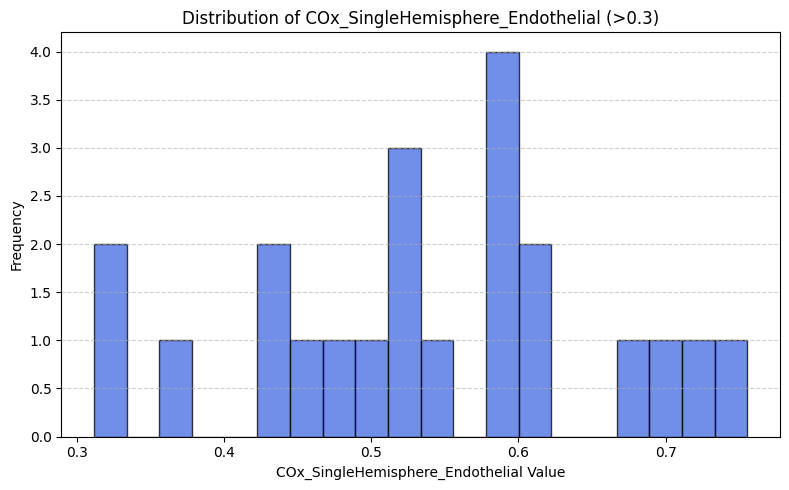

In [ ]:
import matplotlib.pyplot as plt


df = pd.read_csv("data/selected_metrics_export.csv")
df = df.T
df.columns = df.iloc[0]  # Set the first row as header
df = df[1:]              # Remove the header row from the data

cox_endothelial = df['COx_SingleHemisphere_Endothelial']
cox_endothelial[cox_endothelial > 0.3]

plt.figure(figsize=(8, 5))
plt.hist(cox_endothelial[cox_endothelial > 0.3].astype(float), bins=20, color='royalblue', alpha=0.75, edgecolor='black')
plt.title('Distribution of COx_SingleHemisphere_Endothelial (>0.3)')
plt.xlabel('COx_SingleHemisphere_Endothelial Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

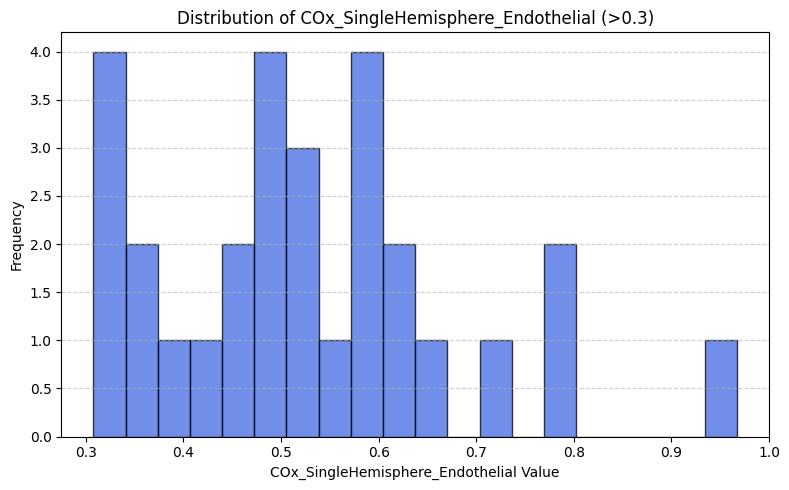

In [ ]:

cox_VLF = df['COx_SingleHemisphere_VLF']
cox_VLF[cox_VLF > 0.3]

plt.figure(figsize=(8, 5))
plt.hist(cox_VLF[cox_VLF > 0.3].astype(float), bins=20, color='royalblue', alpha=0.75, edgecolor='black')
plt.title('Distribution of COx_SingleHemisphere_VLF (>0.3)')
plt.xlabel('COx_SingleHemisphere_VLF Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [76]:
carotis_df['Azonosító2']

0      40
1      50
2      52
3      54
4      55
       ..
113      
114      
115      
116      
117      
Name: Azonosító2, Length: 118, dtype: object

In [91]:
import pandas as pd
import numpy as np

# Adatok betöltése
carotis_df = pd.read_csv("data/carotis_plus.csv")
metrics = pd.read_csv("data/selected_metrics_export.csv")

# Diabetes + MoCA info kinyerése
patient_info = carotis_df[['Azonosító2', 'Diabetes', 'VAMOCA012']].copy()
patient_info.columns = ['Identifier', 'Diabetes', 'DeltaMOCA1']
patient_info['Identifier'] = patient_info['Identifier'].astype(str).str.strip()
patient_info = patient_info[patient_info['Identifier'] != ''].astype({'Identifier': int})

# Metrics transzponálás
metrics_T = metrics.set_index('Metric').T.reset_index()
metrics_T['Identifier'] = metrics_T['index'].str.replace('Patient_', '').astype(int)

# Merge patient_info + metrics
summary_df = pd.merge(patient_info, metrics_T, on='Identifier', how='inner')

# COx oszlopok kiválasztása
cox_cols = [col for col in summary_df.columns if 'COx' in col][:2]
final_cols = ['Identifier', 'Diabetes', 'DeltaMOCA1'] + cox_cols
summary_df = summary_df[final_cols]

print(f"Shape: {summary_df.shape}")
print(summary_df.head())

Shape: (76, 5)
   Identifier Diabetes DeltaMOCA1  COx_SingleHemisphere_Endothelial  \
0          52        0          0                          0.138924   
1          54        0          1                          0.242893   
2          58        0          1                          0.178444   
3          59        0          0                          0.064573   
4          60        0          1                         -0.039334   

   COx_SingleHemisphere_VLF  
0                  0.337988  
1                  0.271680  
2                  0.215480  
3                  0.130913  
4                 -0.049345  


In [98]:

def cox_moca_threshold_table(df):
    # DeltaMOCA1 konvertálása numerikussá
    df = df.copy()
    df['DeltaMOCA1'] = pd.to_numeric(df['DeltaMOCA1'], errors='coerce')
    
    cox_cols = [col for col in df.columns if 'COx' in col and 'Category' not in col]
    thresholds = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
    
    # DeltaMOCA1 < -2 mint kognitív romlás
    df['Cognitive_Decline'] = (df['DeltaMOCA1'] < -2).astype(int)
    
    results = []
    for cox_col in cox_cols:
        for threshold in thresholds:
            data = df[[cox_col, 'Cognitive_Decline']].dropna()
            if len(data) == 0:
                continue
                
            high_cox = data[data[cox_col] >= threshold]
            low_cox = data[data[cox_col] < threshold]
            
            if len(high_cox) == 0 or len(low_cox) == 0:
                continue
            
            results.append({
                'COx_Type': cox_col.replace('COx_SingleHemisphere_', ''),
                'Threshold': threshold,
                'High_N': len(high_cox),
                'High_Decline_N': high_cox['Cognitive_Decline'].sum(),
                'High_Rate': high_cox['Cognitive_Decline'].mean(),
                'Low_N': len(low_cox),
                'Low_Decline_N': low_cox['Cognitive_Decline'].sum(),
                'Low_Rate': low_cox['Cognitive_Decline'].mean()
            })
    
    return pd.DataFrame(results)

# Táblázat
table = cox_moca_threshold_table(summary_df)
pd.DataFrame(table)
pd.DataFrame(table).to_csv('cox_moca_thresholds.csv', index=False)
